# <b>Case Study RAAN Interns</b>
#### <b>[Click here to take a look at the whole article I wrote for this case study](https://christianpellicci.medium.com/raan-case-study-internship-60aaedc11a71).</b></br>

<i>Please note that all the files, the article and  the case study have been hosted as "unlisted", so only who has the link can access these resources.</i>

-------
### <b>Candidate</b>
#### Name: Christian Pellicci
#### Birthdate: 09/10/1994
#### Email: [info.christianpellicci@gmail.com](mailto:info.christianpellicci@gmail.com)
-------

### <b>Instructions to run this notebook:</b>
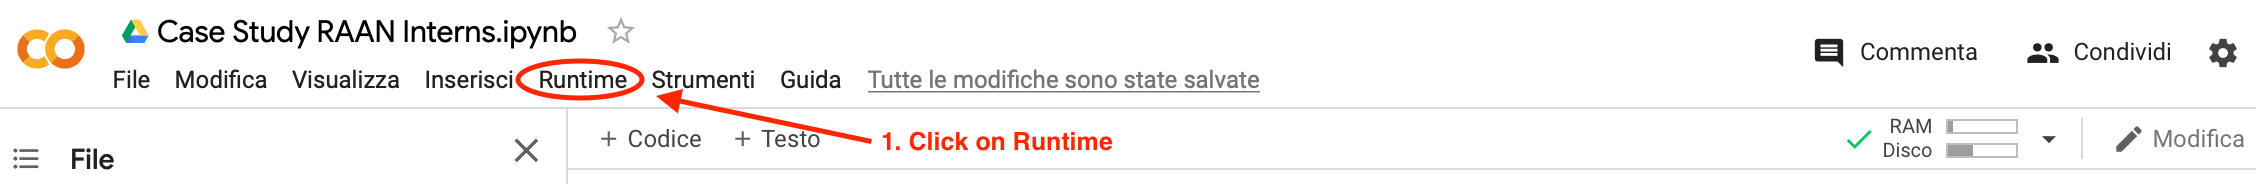
1.In the upper part of this website, click on "Runtime".


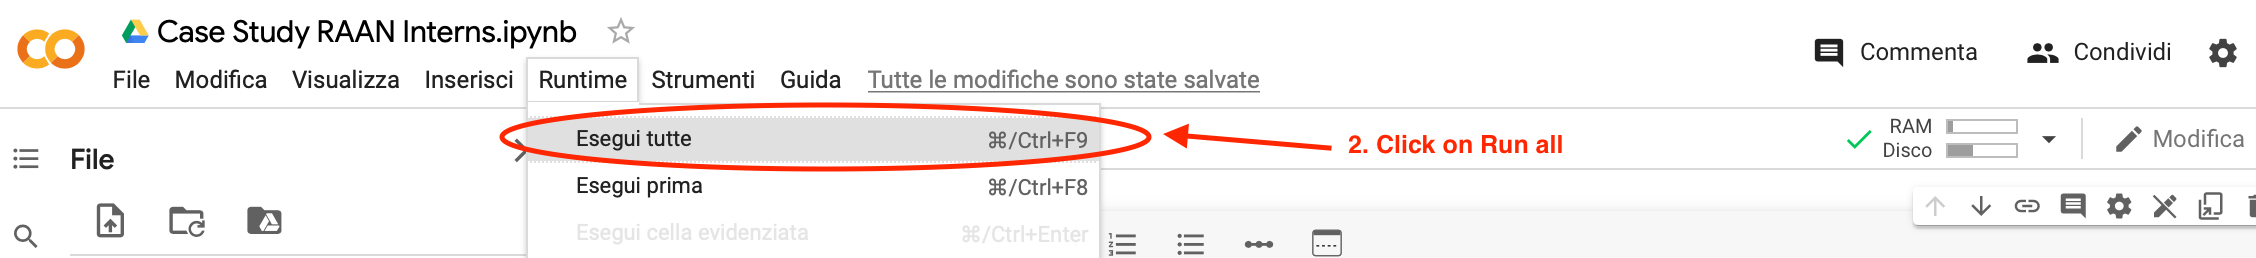
2.Cick on  "Run all".

If you prefer, you can simply use a keyboard shortcut:
- For Windows users: ctrl+fn+F9 or ctrl+F9
- For Osx (Mac) users: cmd+fn+F9 or cmd+F9


-------
### <b>Tasks and approach explanation</b>

<b>Task 1:</b></br>
I splitted the "raan_case_study interns.xlsx" dataset in two ".xlsx" files:</br>
- "raan_case_study_interns_nodes.xlsx", containing the nodes</br>
- "raan_case_study_interns_edges.xlsx", containing the edges</br>

<i>Please note that the so-obtained datasets have been hosted into my GoogleDrive account, and will be automatically downloaded in the notebook.</i>

<br>I built both 2D and 3D network visualizations:</br>
 - <b>2D:</b></br>
I created a 2D (bidimensional) network visualization using <b>networkx</b>.
 - <b>3D:</b></br>
I created a 3D (tridimensional) interactive network visualization using <b>plotly</b>.</br>


<br> </br>
<br><b>Task 2:</b></br>
I used <b>plotly.write_html</b> to extrcact the 3D interactive graph as an "html" web application.</br>
<i>Please note that the notebook will write this file in the execution runtime with the name of "Christian_Pellicci_interactive_visualization_.html".</i></br>

Then, using <b>chart_studio</b>, I hosted the web application into my plotly account, and I extracted the code to embed the so-obtained web application online.


#Installing the necessary packages

In [1]:
!pip install networkx

In [2]:
!pip install plotly

In [3]:
!pip install chart_studio

# Importing the necessary packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import networkx as nx
import plotly.graph_objects as go

# Importing the Edges and Nodes and visualizing them as a Pandas DataFrame

In [5]:
#Since the ".xlsx" file sent was organized in shhets, I splitted it into two files, one for edges, and one for nodes.
#I uploaded these files in my "Google Drive", so that they can be automatically downloaded running the notebook.

edges_url = "https://docs.google.com/spreadsheets/d/1KsfrOtnKIxsoYqjLwuUbwie7BfKFVTeh/export?format=xlsx"
nodes_url = "https://docs.google.com/spreadsheets/d/1r8X7IXx-1FWyjeuFo5kBoQNTxAaOwbQK/export?format=xlsx"


In [6]:
#Importing and visualizing edges in a Pandas DataFrame

edges = pd.read_excel(edges_url)

edges.head()

,source_id,target_id,weights
0,966,945,13
1,966,879,10
2,649,966,9
3,941,966,8
4,966,467,8


In [7]:
#Importing and visualizing nodes in a Pandas DataFrame

nodes = pd.read_excel(nodes_url)

nodes.head()

,node_id,node_color,node_label
0,3,#0066CC,James
1,158,#0066CC,John
2,172,#0066CC,Robert
3,185,#0066CC,Michael
4,349,#0066CC,William


# Task 1

In [8]:
#Building the Graph with networkx

G = nx.from_pandas_edgelist(df=edges, source="source_id", target="target_id", edge_attr="weights")

In [9]:
#Building a dictionary with all the node_id and node_labels to be passed into the networkx drawer (nx.draw_networkx())

n_labels = {}
for node, label in zip(nodes.node_id.tolist(), nodes.node_label.tolist()):
  n_labels[node] = label

### 2D Graph

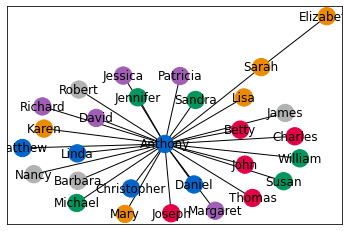

In [10]:
#Drawing the bidimensional Graph

nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=nodes.node_color, labels=n_labels, with_labels=True)

In [11]:
#Determining the position of the nodes for the spring layout in 3D, and separating the X,Y,Z coordinates for Plotly
spring_3D = nx.spring_layout(G, dim=3)

x_nodes = [spring_3D[val][0] for val in nodes.node_id.tolist()]# x-coordinates
y_nodes = [spring_3D[val][1] for val in nodes.node_id.tolist()]# y-coordinates
z_nodes = [spring_3D[val][2] for val in nodes.node_id.tolist()]# z-coordinates

In [12]:
#Setting the edges from the networkx Graph as a list
edge_list = G.edges()

edge_list

EdgeView([(966, 945), (966, 879), (966, 649), (966, 941), (966, 467), (966, 1042), (966, 785), (966, 619), (966, 457), (966, 639), (966, 747), (966, 185), (966, 349), (966, 1157), (966, 1152), (966, 517), (966, 158), (966, 552), (966, 498), (966, 574), (966, 1025), (966, 813), (966, 792), (966, 172), (966, 1009), (966, 3), (966, 709), (792, 652)])

In [13]:
#Creating lists which contain the starting and ending coordinates of each edge, and filling them with the coordiates
x_edges=[]
y_edges=[]
z_edges=[]

#format:[beginning,ending,None]
for edge in edge_list:
    x_coords = [spring_3D[edge[0]][0],spring_3D[edge[1]][0],None]
    x_edges += x_coords

    y_coords = [spring_3D[edge[0]][1],spring_3D[edge[1]][1],None]
    y_edges += y_coords

    z_coords = [spring_3D[edge[0]][2],spring_3D[edge[1]][2],None]
    z_edges += z_coords

In [14]:
#Creating a trace for the edges
trace_edges = go.Scatter3d(x=x_edges,
                           y=y_edges,
                           z=z_edges,
                           mode='lines',
                           line=dict(color='black', width=2),
                           hoverinfo='none')

In [15]:
#Creating a trace for the nodes
trace_nodes = go.Scatter3d(x=x_nodes,
                           y=y_nodes,
                           z=z_nodes,
                           mode='markers',
                           marker=dict(symbol='circle',
                                       size=10,
                                       color=nodes.node_color.tolist(),
                                       line=dict(color='black', width=1.5)),
                           text=nodes.node_label.tolist(),
                           hoverinfo='text')

In [16]:
#Setting the axis for the plot 
axis = dict(showbackground=False,
            showline=False,
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            title='')

In [17]:
#Creating the plot layout
layout = go.Layout(title="Case Study - RAAN interns",
                   width=700,
                   height=650,
                   showlegend=False,
                   scene=dict(xaxis=dict(axis),
                              yaxis=dict(axis),
                              zaxis=dict(axis)),
                   margin=dict(t=100),
                   hovermode='closest')

### 3D Interactive Graph

In [18]:
#Including the traces, the data and the layout to plot and creating the figure
data = [trace_edges, trace_nodes]
fig = go.Figure(data=data, layout=layout)

fig.show()

#You can explre the interactive graph below in 3 dimensions!

# Task 2




In [19]:
#Extracting the Plotly web application in an html file

fig.write_html(file="Christian_Pellicci_interactive_visualization_.html")

In [20]:
#Importing chart_studio and setting up my credentials
import chart_studio

username = 'chp102'
api_key = '6XxyxkkSRKYn74OrVAB7'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [21]:
#Importing the plotly web application inmy plotly account
import chart_studio.plotly as py

plot_url = py.plot(fig, filename = 'Christian_Pellicci_interactive_visualization_.html', auto_open=True, )

#You can copy and paste the link below to visualize the visualizaion on my plotly account.
print(plot_url)

https://plotly.com/~chp102/4/


In [22]:
#Obtaining the cde to embed the web application online
import chart_studio.tools as tls

tls.get_embed(plot_url)

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~chp102/4.embed" height="525" width="100%"></iframe>'